In [13]:
import pandas as pd
import numpy as np 
import pickle 
import os
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [15]:
# for f in os.listdir("cifar-100-python-raw"):
#     if ".txt" in f:
#         continue
#     print(os.path.join("cifar-100-python-raw",f))
#     print(unpickle(os.path.join("cifar-100-python-raw",f)))

In [ ]:
meta_dict = unpickle(os.path.join("cifar-100-python-raw","meta"))
fine_labels = [str(i,encoding='utf-8') for i in meta_dict[b'fine_label_names']]
#print(fine_labels)
#print(len(fine_labels))
coarse_labels = [str(i,encoding='utf-8') for i in meta_dict[b'coarse_label_names']]
#print(coarse_labels)
#print(len(coarse_labels))

In [ ]:
train_dict = unpickle(os.path.join("cifar-100-python-raw","train"))
#print(train_dict)
train_cols = [str(i,encoding='utf-8') for i in train_dict.keys()]
train_cols.remove("batch_label") # Not necessary
#print(train_cols)
train_df = pd.DataFrame(columns=train_cols)
#display(train_df)
train_df[train_cols[0]] = [str(i,encoding='utf-8') for i in train_dict[b'filenames']]
train_df[train_cols[1]] = train_dict[b'fine_labels']
train_df[train_cols[2]] = train_dict[b'coarse_labels']
# Image arrays need to be reshaped and oriented
train_df[train_cols[3]] = [np.array(arr).reshape((32,32,3),order="F").transpose((1,0,2)) for arr in train_dict[b'data']]
#display(train_df)

In [ ]:
test_dict = unpickle(os.path.join("cifar-100-python-raw","test"))
#print(test_dict)
test_cols = [str(i,encoding='utf-8') for i in test_dict.keys()]
test_cols.remove("batch_label") # Not necessary
#print(test_cols)
test_df = pd.DataFrame(columns=test_cols)
#display(train_df)
test_df[test_cols[0]] = [str(i,encoding='utf-8') for i in test_dict[b'filenames']]
test_df[test_cols[1]] = test_dict[b'fine_labels']
test_df[test_cols[2]] = test_dict[b'coarse_labels']
# Image arrays need to be reshaped and oriented
test_df[test_cols[3]] = [np.array(arr).reshape((32,32,3),order="F").transpose((1,0,2)) for arr in test_dict[b'data']]
#display(test_df)

In [8]:
display(train_df)

,filenames,fine_labels,coarse_labels,data
0,bos_taurus_s_000507.png,19,11,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,stegosaurus_s_000125.png,29,15,"[[[255, 255, 255], [253, 253, 253], [253, 253,..."
2,mcintosh_s_000643.png,0,4,"[[[250, 250, 248], [248, 249, 243], [247, 248,..."
3,altar_boy_s_001435.png,11,14,"[[[124, 194, 221], [131, 202, 228], [135, 206,..."
4,cichlid_s_000031.png,1,1,"[[[43, 49, 46], [32, 40, 34], [87, 89, 47], [1..."
...,...,...,...,...
49995,tree_squirrel_s_000969.png,80,16,"[[[130, 135, 101], [127, 131, 103], [131, 135,..."
49996,tiger_beetle_s_000315.png,7,7,"[[[167, 157, 140], [199, 198, 182], [193, 193,..."
49997,bear_s_000631.png,3,8,"[[[248, 244, 242], [240, 232, 223], [236, 232,..."
49998,beetle_s_000411.png,7,7,"[[[156, 154, 137], [151, 146, 123], [151, 144,..."


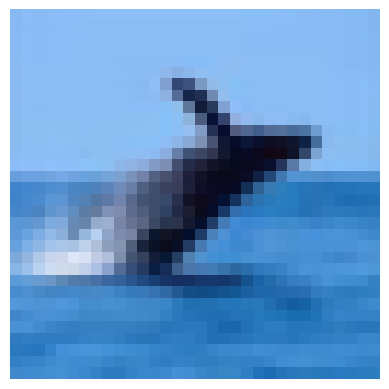

In [18]:
plt.imshow(train_df.loc[400,"data"])
plt.axis('off')
plt.show()
# plt.savefig(train_df.loc[3,"filenames"], bbox_inches='tight')

In [ ]:
image = Image.fromarray(train_df.loc[400,"data"])
image = image.convert('RGB')
#image.save(os.path.join("c100_extracted/images",train_df.loc[400,"filenames"]))